In [ ]:
In this notebook, I will compare KNN and DecisionTree models performance. 
Then I will analyze the features that are most important for predicting loan approval
and provide insights to the bank on how to improve their loan approval process.

In [1]:
# load preprocessed_dataset.csv

import pandas as pd
df = pd.read_csv('preprocessed_dataset.csv')
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [2]:
# select 6 features after exploratory data analysis and split to train, test sets

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as ac, f1_score, classification_report

x=df[['Dependents','Education','Self_Employed','ApplicantIncome','LoanAmount','Credit_History']]
y=df[['Loan_Status']]


In [ ]:
# First, start with building KNN model

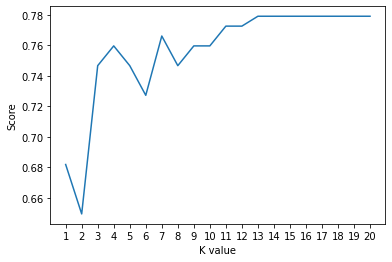

KNN best accuracy 0.7792207792207793


In [3]:
# scale x and transform y to fit KNN
# find the best n_neighbors, which is 11

from sklearn import datasets, neighbors
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

ss = StandardScaler()
x_tf = ss.fit_transform(x)

x_tf_train,x_tf_test,y_r_train,y_r_test=train_test_split(x_tf,y.values.ravel(),test_size=0.25,random_state=50)

scoreListknn = []
for i in range(1,21):
    KNclassifier = neighbors.KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(x_tf_train, y_r_train)
    scoreListknn.append(KNclassifier.score(x_tf_test, y_r_test))
    
KNAcc = max(scoreListknn)

plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
print("KNN best accuracy", KNAcc)

In [4]:
# evaluate KNN model

from sklearn.model_selection import cross_val_score

y_predknn = KNclassifier.predict(x_tf_test)

print("KNN Accuracy:", ac(y_r_test,y_predknn)*100)
sco_knn =(cross_val_score(KNclassifier,x_tf,y.values.ravel(),cv=5))
print("KNN Cross Validated Average Accuracy:", np.mean(sco_knn)*100)
print("F1 Score: ",f1_score(y_r_test,y_predknn))
print(classification_report(y_r_test, y_predknn))

KNN Accuracy: 77.92207792207793
KNN Cross Validated Average Accuracy: 80.61975209916034
F1 Score:  0.8521739130434782
              precision    recall  f1-score   support

           0       0.88      0.42      0.56        53
           1       0.76      0.97      0.85       101

    accuracy                           0.78       154
   macro avg       0.82      0.69      0.71       154
weighted avg       0.80      0.78      0.75       154



In [ ]:
# Next, building DecisionTree model

In [5]:
# splitting the original data without scaling
# train the DecisionTree model with best tuned parameters

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=50)

model=DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)


In [6]:
# evaluate DecisionTree model

from sklearn.metrics import accuracy_score as ac, f1_score, classification_report
from sklearn.model_selection import cross_val_score

print("DecisionTree Accuracy:", ac(y_test,y_pred)*100)
sco =(cross_val_score(model,x,y,cv=5))
print("DecisionTree CV Average Accuracy:", np.mean(sco)*100)
print("F1 Score: ",f1_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

DecisionTree Accuracy: 78.57142857142857
DecisionTree CV Average Accuracy: 80.9462881514061
F1 Score:  0.8558951965065502
              precision    recall  f1-score   support

           0       0.88      0.43      0.58        53
           1       0.77      0.97      0.86       101

    accuracy                           0.79       154
   macro avg       0.83      0.70      0.72       154
weighted avg       0.81      0.79      0.76       154



In [ ]:
From the evaluation above, we can see that both models perform very similarly to each other.

Even with an extra step of x-scaling for KNN, DecisionTree actually performs slightly better.

KNN Accuracy: 77.92207792207793
KNN Cross Validated Average Accuracy: 80.61975209916034
    
DecisionTree Accuracy: 78.57142857142857
DecisionTree CV Average Accuracy: 80.9462881514061
    
so we will choose DecisionTree to deploy.

In [ ]:
# Next, I will analyse what feature is the most important in the loan approval decision

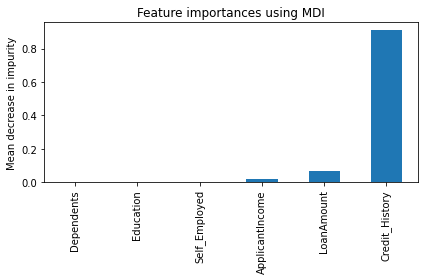

In [14]:
import matplotlib.pyplot as plt

std = np.std([model.feature_importances_ ], axis=0)

importances=pd.Series(model.feature_importances_, index=x.columns)

fig, ax = plt.subplots()
importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [9]:
# check with training DecisionTree model with only one feature Credit_History

x7=df[['Credit_History']]
y7=df[['Loan_Status']]
x_train7, x_test7,y_train7,y_test7 =train_test_split(x7,y7,test_size=0.25,random_state=50)
model7=DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
model7.fit(x_train7,y_train7)
y_pre7 = model7.predict(x_test7)
print("DecisionTree with one feature Accuracy", ac(y_test7,y_pre7)*100)
sco7=(cross_val_score(model7,x7,y7,cv=5))
print("DecisionTree with one feature CV average Accuracy", np.mean(sco7)*100)

DecisionTree with one feature Accuracy 78.57142857142857
DecisionTree with one feature CV average Accuracy 80.9462881514061


In [ ]:
Report summarizing the findings and insights

Both models are performing similarly with accuracy approximately from 78-80% 
which could be improved further, but for now should be good enough for production. 

Nonetheless, for recall score for label 0, not approve the loan,
both of them still not doing very well, at only around 42%.

That means, out of all those customers who should NOT be approved a loan,
the bank can only tell less than half correctly.

This also reflects in F1 score that is weighted towards precision (high precision, low recall).
which means, the bank only says no to very few people they are sure of not able to pay back.

If the bank wants to be stricter in not giving the loan to those who might not be able to pay back,
then we will have to re-balance this number.

Lastly, only Credit_History column alone can predict defaulting customers as well as using the whole dataset